In [27]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import svm
from sklearn import metrics
import matplotlib.pyplot as plt
import scikitplot as skplot
import pandas as pd
import numpy as np

In [2]:
from pydataset import data
# Get the housing data
df = data('Housing')
df.head().values

array([[42000.0, 5850, 3, 1, 2, 'yes', 'no', 'yes', 'no', 'no', 1, 'no'],
       [38500.0, 4000, 2, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no'],
       [49500.0, 3060, 3, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no'],
       [60500.0, 6650, 3, 1, 2, 'yes', 'yes', 'no', 'no', 'no', 0, 'no'],
       [61000.0, 6360, 2, 1, 1, 'yes', 'no', 'no', 'no', 'no', 0, 'no']],
      dtype=object)

In [3]:
# label 'yes' and 'no'
d = dict(zip(['no', 'yes'], range(0,2)))
for i in zip(df.dtypes.index, df.dtypes):
    if str(i[1]) == 'object':
        df[i[0]] = df[i[0]].map(d)

In [4]:
for i, j in enumerate(np.unique(pd.qcut(df['price'], 3))):
    print(i, j)

0 (24999.999, 53000.0]
1 (53000.0, 74500.0]
2 (74500.0, 190000.0]


In [5]:
df['price'] = pd.qcut(df['price'], 3, labels=['0', '1', '2']).cat.codes
y = df['price'] 
x = df.drop('price', 1)

In [6]:
xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.3, random_state=0)

In [7]:
LogReg=LogisticRegression()
LogReg.fit(xtrain, ytrain)
LResult=LogReg.predict(xtest)
metrics.accuracy_score(ytest,LResult)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5975609756097561

In [9]:
knn=KNeighborsClassifier()
knn.fit(xtrain, ytrain)
KResult=knn.predict(xtest)
metrics.accuracy_score(ytest,KResult)

0.524390243902439

In [37]:
SVM=svm.SVC(kernel='linear')
SVM.fit(xtrain, ytrain)
SResult=SVM.predict(xtest)
metrics.accuracy_score(ytest,SResult)

0.6829268292682927

In [38]:
DT=DecisionTreeClassifier()
DT.fit(xtrain, ytrain)
DResult=DT.predict(xtest)
metrics.accuracy_score(ytest,DResult)

0.6158536585365854

In [39]:
RF=RandomForestClassifier()
RF.fit(xtrain, ytrain)
RResult=RF.predict(xtest)
metrics.accuracy_score(ytest, RResult)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.6951219512195121

In [40]:
cross_val_score(DT, x,y,cv=2, scoring='accuracy').mean()

0.6117216117216118

In [41]:
cmDATA=metrics.confusion_matrix(ytest,RResult)
cmDATA

array([[34,  7,  0],
       [18, 32,  7],
       [ 1, 17, 48]], dtype=int64)

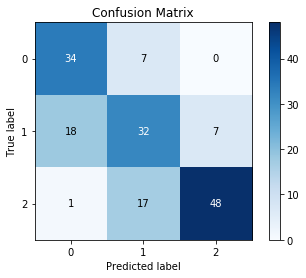

In [42]:
skplot.metrics.plot_confusion_matrix(ytest,RResult)
plt.show()

In [43]:
LR=LogisticRegression()
KNN=KNeighborsClassifier()
SVM=svm.SVC()
DT=DecisionTreeClassifier()
RF=RandomForestClassifier()
classifier=[('A',LR),('B',KNN),('C',SVM),('D',DT),('E',RF)]

In [44]:
for c_name,cf in classifier:
    cf.fit(xtrain, ytrain)
    TResult=cf.predict(xtest)
    accuracy=metrics.accuracy_score(ytest,TResult)
    print(accuracy)

0.5975609756097561
0.524390243902439
0.4329268292682927
0.6402439024390244
0.6524390243902439


C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22."

In [45]:
VC=VotingClassifier(estimators=classifier)
VC.fit(xtrain, ytrain)
VResult=VC.predict(xtest)
metrics.accuracy_score(ytest,VResult)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6219512195121951